## Carga de bibliotecas

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Carga de datos

In [2]:
df = pd.read_csv("stats.csv", encoding="ISO-8859-1", delimiter=";")

In [3]:
pd.set_option('display.max_columns', None)
df.head(n=10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.20,31.0,74.9,293.0,85.7,13.30,16.20,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.10,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.20,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.00,0.06,0.00,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.00,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.50,47.2,81.5,751.5,318.5,10.90,12.90,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.30,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.50,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.00,0.05,0.00,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.00,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.00,49.5,80.8,676.0,188.1,18.50,22.00,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.10,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.00,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.00,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.50,64.9,91.6,946.3,226.9,29.60,31.80,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.10,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.50,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.00,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.90,43.4,87.3,613.6,224.7,17.90,19.40,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.60,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.90,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.00,0.00,0.00,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,

In [4]:
n_rows, n_columns = df.shape
print(f"La tabla de datos contiene {n_columns} variables sobre {n_rows} jugadores.")

La tabla de datos contiene 124 variables sobre 2689 jugadores.


## Entender mejor el conjunto de datos

### Distribución de los jugadores

In [5]:
# por campeonato
df.groupby("Comp").size()

Comp
Bundesliga        490
La Liga           550
Ligue 1           565
Premier League    540
Serie A           544
dtype: int64

In [6]:
# por posición en el campo
df.groupby("Pos").size()

Pos
DF      825
DFFW     38
DFMF    101
FW      409
FWDF     30
FWMF    244
GK      164
MF      608
MFDF     62
MFFW    208
dtype: int64

## Limpieza de datos

### Duplicados y valores "nan"

In [7]:
duplicate_values = df.duplicated()
print(f"Hay {df[duplicate_values].size} duplicados.")

Hay 0 duplicados.


In [8]:
columns_with_missing_values = [
    col for col, truth_value in df.isna().any().items() if truth_value
]
print("En las siguientes columnas faltan valores :", end=" ")
print(*columns_with_missing_values, sep = ", ", end=".")

En las siguientes columnas faltan valores : Nation.

Ninguna columna relevante para la agrupación contiene valores "nan". Por lo tanto, no hace falta cambiar esas valores por otras.

In [9]:
with open("irrelevant_columns.txt", "r") as f:
    raw = f.read()
    irrelevant_columns = raw.split("\n")

irrelevant_columns += df.columns[df.columns.str.contains('%')].to_list()
print(irrelevant_columns)
df_bis = df.drop(irrelevant_columns, axis=1)

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', '90s', 'SoT%', 'PasTotCmp%', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'TklDri%', 'ToSuc%', 'ToTkl%', 'AerWon%']


In [10]:
# diviser les colonnes par le nombre de minutes jouées
df_bis = df_bis.div(df_bis["Min"], axis=0)
df_bis.drop(["Min"], axis=1, inplace=True)

### Correlaciones entre las variables

In [11]:
def get_redundant_pairs(df):
    """
    Get diagonal and lower triangular pairs of correlation matrix.
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [12]:
get_top_abs_correlations(df_bis)

TklWon     TklW         1.000000
PasCrs     Crs          1.000000
PasTotAtt  PasAtt       1.000000
PasTotCmp  PasCmp       1.000000
Touches    TouLive      1.000000
PasAtt     PasLive      0.995157
PasTotAtt  PasLive      0.995157
Blocks     BlkPass      0.985536
PasShoCmp  PasShoAtt    0.982812
G/Sh       G/SoT        0.976353
dtype: float64

Quitamos las columnas que son combinaciones lineales de otras.

In [13]:
to_drop = [
    "PasTotCmp",
    "PasTotAtt",
    "PasCrs",
    "TklW",
    "TouLive",
]
df_bis.drop(to_drop, axis=1, inplace=True)

## Normalización de datos

In [14]:
normalizer = Normalizer()
cleansed_data = normalizer.fit_transform(df_bis.values)
print(f"Now all values range between {np.max(cleansed_data)} and {np.min(cleansed_data)}.")

Now all values range between 1.0 and 0.0.


## Principal Component Analysis

In [15]:
pca = PCA()
pca.fit(cleansed_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

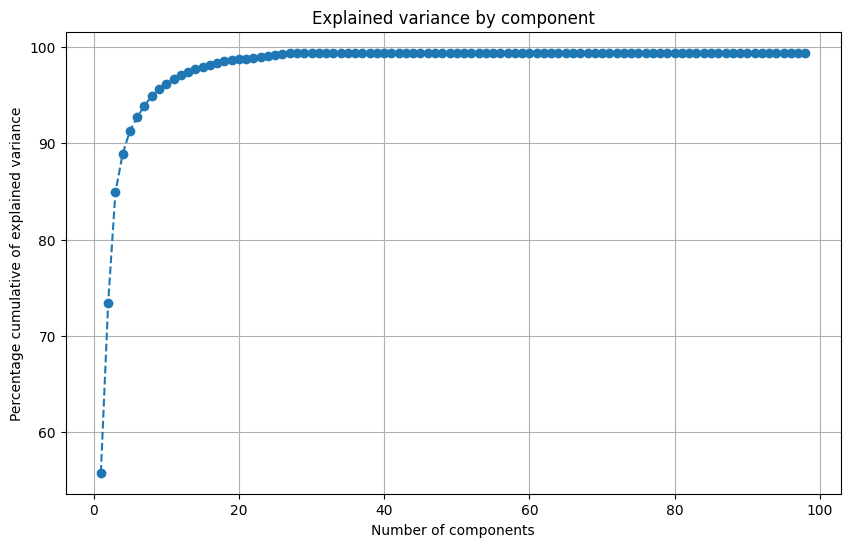

In [16]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage cumulative of explained variance")
plt.xlabel("Number of components")
plt.title("Explained variance by component")
plt.show()

In [17]:
n_components = next(idx for idx, x in enumerate(per_var.cumsum()) if x > 90)
print(n_components)

4


In [18]:
pca = PCA(n_components)
scores_pca = pca.fit_transform(cleansed_data)

In [19]:
dico = {i: j for i, j in enumerate(df_bis.columns)}
most_important_variables_per_component = np.array(
    [[dico[idx] for idx in (-pca.components_[i, :]).argsort()]
     for i in range(n_components)])
print(most_important_variables_per_component[:, :5])

[['CarTotDist' 'CarPrgDist' 'Touches' 'Rec' 'TouAtt3rd']
 ['PasTotPrgDist' 'TouDef3rd' 'Fls' 'TouDefPen' 'CarPrgDist']
 ['Touches' 'Fls' 'TouMid3rd' 'TouDef3rd' 'Rec']
 ['CarPrgDist' 'Fls' 'TklWon' 'Crs' 'CrdY']]


## Clustering

In [20]:
WCSS = []

for i in range(1,30):
  k_means = KMeans(n_clusters = i, init = "k-means++", random_state = i)
  k_means.fit(scores_pca)
  WCSS.append(k_means.inertia_)

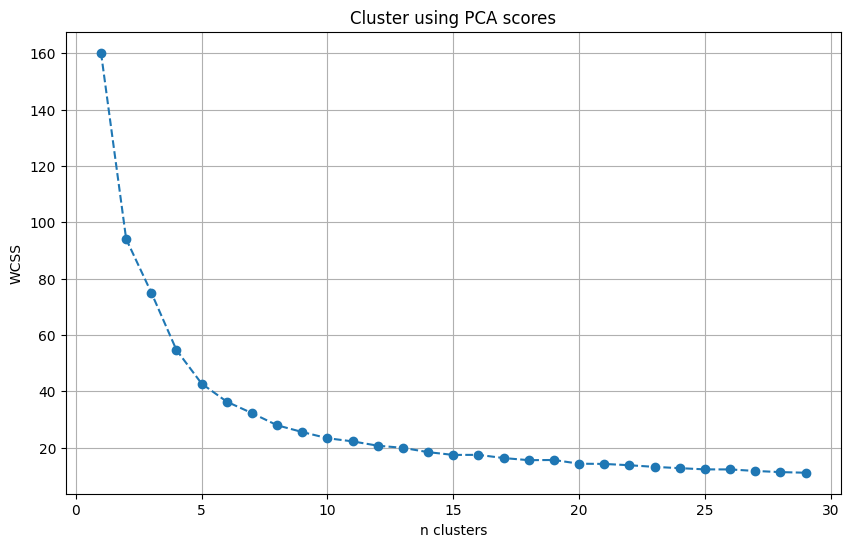

In [21]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA scores")
plt.ylabel("WCSS")
plt.xlabel("n clusters")
plt.show()

In [22]:
k_means = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
k_means.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

## Resultados

In [23]:
# concatening the original df with the components informations present in scores_pca
df_pca = pd.concat([df, pd.DataFrame(scores_pca)], axis=1)
new_columns = [f"component_{i+1}" for i in range(n_components)]
df_pca.columns.values[-n_components:] = new_columns

In [24]:
# setting the cluster label to each observation
df_pca["clusters"] = k_means.labels_

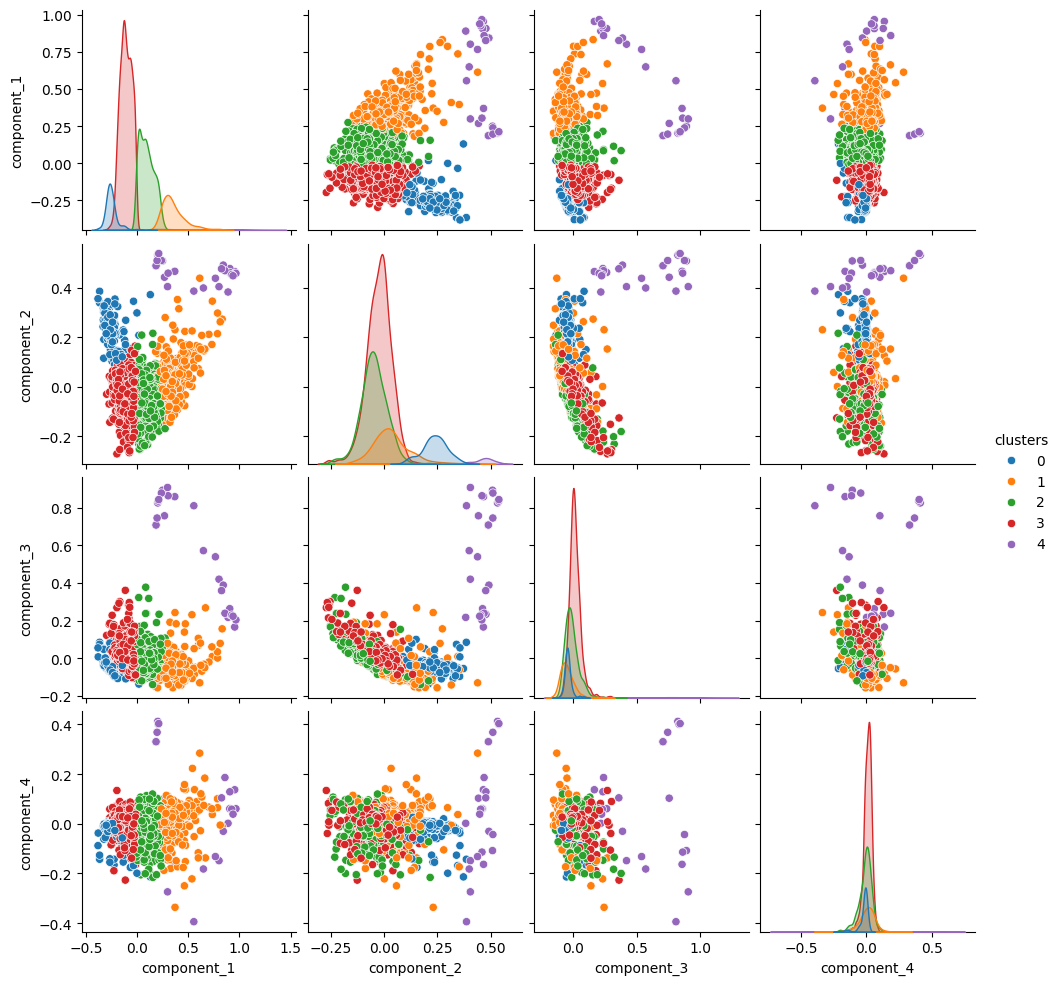

In [25]:
sns.pairplot(df_pca.iloc[:, -n_components - 1:], hue="clusters", palette="tab10")

In [49]:
# take each cluster's centroid
centroids = k_means.cluster_centers_

closest, _ = vq(centroids, scores_pca)
canonic_players = df_pca.iloc[closest]
display(canonic_players)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,component_1,component_2,component_3,component_4,clusters
2285,2286,Tobias Sippel,GER,GK,M'Gladbach,Bundesliga,34,1988,3,3,270,3.0,0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,30.3,46.3,65.5,663.7,458.7,10.0,10.0,100.0,14.30,14.30,100.0,5.67,21.70,26.2,0.00,0.00,0.33,0.00,0.00,0.00,46.3,32.7,13.70,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,30.3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.33,47.7,39.70,47.70,0.0,0.00,0.00,47.7,0.00,0.00,0.0,0.00,0.0,23.7,111.0,74.0,0.00,0.00,0.00,0.00,0.00,25.3,0.00,0.33,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.67,0.67,0.33,66.7,-0.252156,0.227499,-0.045123,-0.022068,0
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,1507,16.7,5,2.75,1.02,37.0,0.11,0.29,18.1,0.0,0.0,0.0,17.6,25.3,69.7,219.5,49.6,11.7,14.9,79.0,4.43,6.17,71.8,0.24,0.84,28.6,0.24,0.54,0.78,0.42,0.06,1.80,25.3,24.3,0.84,0.06,0.06,0.00,0.96,0.78,0.00,0.00,0.0,0.0,17.6,0.18,1.56,2.34,1.32,0.0,0.18,0.36,0.42,0.06,0.24,0.12,0.0,0.06,0.0,0.06,0.0,1.14,0.72,0.54,0.30,0.30,0.30,1.32,22.7,1.02,0.54,0.06,0.48,0.84,1.98,0.66,0.00,38.0,0.96,5.45,14.6,18.70,4.97,38.0,3.17,1.02,32.1,1.86,58.5,28.6,177.7,74.7,3.05,1.08,1.14,2.57,0.96,27.1,9.52,0.18,0.0,0.0,1.56,1.80,0.72,0.96,0.72,0.00,0.0,0.0,4.43,0.42,1.32,24.1,0.358038,0.020137,-0.060877,-0.005613,1
506,507,Tio Cipot,SVN,DFFW,Spezia,Serie A,19,2003,3,0,51,0.6,0,1.67,1.67,100.0,0.00,0.00,30.6,0.0,0.0,0.0,26.7,38.3,69.6,391.7,100.0,10.0,13.3,75.0,15.00,18.30,81.8,0.00,1.67,0.0,0.00,1.67,0.00,1.67,0.00,3.33,38.3,31.7,6.67,1.67,0.00,0.00,1.67,3.33,1.67,1.67,0.0,0.0,26.7,0.00,1.67,1.67,1.67,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,6.67,5.00,3.33,0.00,3.33,1.67,3.33,50.0,1.67,0.00,0.00,0.00,0.00,6.67,1.67,0.00,53.3,1.67,5.00,26.7,25.00,3.33,53.3,6.67,3.33,50.0,3.33,50.0,33.3,166.7,75.0,3.33,0.00,0.00,1.67,5.00,40.0,8.33,0.00,0.0,0.0,0.00,1.67,0.00,1.67,5.00,0.00,0.0,0.0,1.67,0.00,1.67,0.0,0.096331,-0.049495,-0.016681,-0.024510,2
713,714,Danilho Doekhi,NED,DF,Union Berlin,Bundesliga,24,1998,11,11,984,10.9,4,0.46,0.46,100.0,0.80,0.80,8.3,0.0,0.0,0.0,31.7,40.4,78.4,558.3,184.6,13.0,15.0,86.6,15.80,18.90,83.5,2.20,4.59,48.0,0.09,0.18,3.03,0.18,0.00,3.49,40.4,39.4,0.92,0.46,0.00,0.18,0.28,0.18,0.00,0.00,0.0,0.0,31.7,0.00,0.73,0.55,0.46,0.0,0.00,0.00,0.09,0.00,0.18,0.09,0.0,0.00,0.0,0.09,0.0,1.74,1.19,1.01,0.73,0.00,0.83,1.10,75.0,0.28,1.38,0.46,0.92,1.47,3.21,3.67,0.00,50.8,3.39,22.40,25.3,3.49,0.83,50.8,0.28,0.09,33.3,0.00,0.0,26.9,127.8,57.7,0.73,0.28,0.09,0.18,0.00,29.6,1.01,0.00,0.0,0.0,0.55,0.55,0.00,0.28,1.19,0.09,0.0,0.0,3.58,2.48,1.93,56.3,-0.115100,-0.026212,0.008685,0.006941,3
1107,1108,Mario Hernández,ESP,FW,Rayo Vallecano,La Liga,24,1999,1,0,1,0.0,0,2.00,0.00,0.0,0.00,0.00,27.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,3